<a href="https://colab.research.google.com/github/apaz304/AI_with_Python/blob/main/Chapters/Chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification 1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
datapath = "/content/drive/MyDrive/Metropolia_AI_Python/Data_demos/"
df = pd.read_csv( datapath + "exams.csv", skiprows=0, delimiter=",")
print(df)

        exam1      exam2  admit
0   34.623660  78.024693      0
1   30.286711  43.894998      0
2   35.847409  72.902198      0
3   60.182599  86.308552      1
4   79.032736  75.344376      1
..        ...        ...    ...
95  83.489163  48.380286      1
96  42.261701  87.103851      1
97  99.315009  68.775409      1
98  55.340018  64.931938      1
99  74.775893  89.529813      1

[100 rows x 3 columns]


In [ ]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]
admit_yes = df.loc[y == 1]
admit_no = df.loc[y == 0]

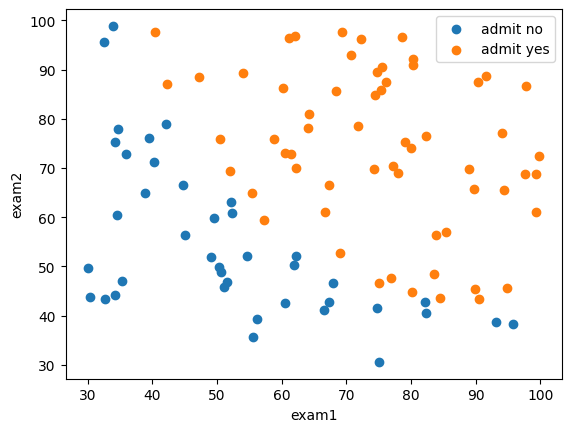

In [ ]:
plt.scatter(admit_no.iloc[:,0],admit_no.iloc[:,1],label="admit no")
plt.scatter(admit_yes.iloc[:,0],admit_yes.iloc[:,1],label="admit yes")
plt.xlabel("exam1")
plt.ylabel("exam2")
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)

(75, 2)


[[11  0]
 [ 4 10]]


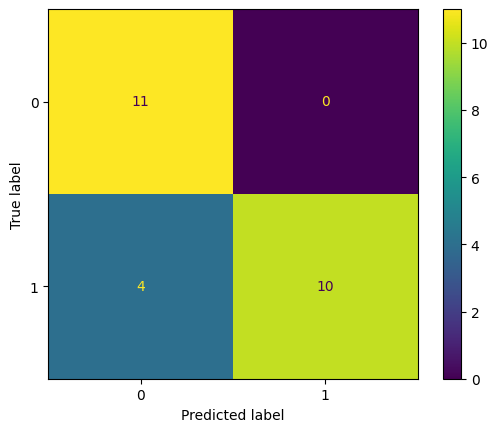

Accuracy: 0.84
Precision: 1.0
Recall: 0.7142857142857143


In [ ]:
# Fittig model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating model
y_pred = model.predict(X_test)

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

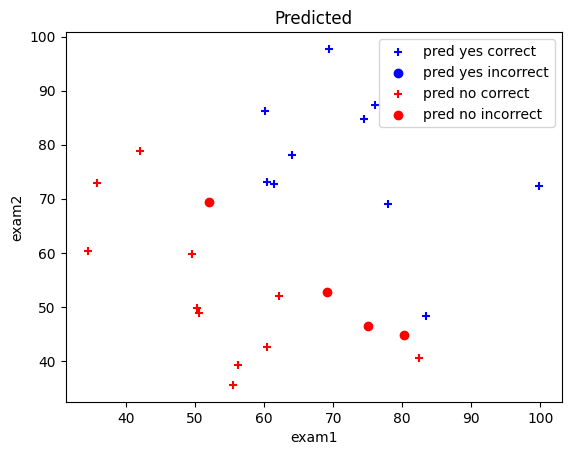

In [ ]:
y_test2 = y_test.to_numpy()
idx1 = np.logical_and(y_pred == 1, y_test2 == 1)
idx2 = np.logical_and(y_pred == 1, y_test2 == 0)
idx3 = np.logical_and(y_pred == 0, y_test2 == 0)
idx4 = np.logical_and(y_pred == 0, y_test2 == 1)
X1 = X_test.loc[idx1]
X2 = X_test.loc[idx2]
X3 = X_test.loc[idx3]
X4 = X_test.loc[idx4]

plt.scatter(X1.iloc[:,0],X1.iloc[:,1],label="pred yes correct",marker="+",color="blue")
plt.scatter(X2.iloc[:,0],X2.iloc[:,1],label="pred yes incorrect",marker="o",color="blue")
plt.scatter(X3.iloc[:,0],X3.iloc[:,1],label="pred no correct",marker="+",color="red")
plt.scatter(X4.iloc[:,0],X4.iloc[:,1],label="pred no incorrect",marker="o",color="red")

plt.xlabel("exam1")
plt.ylabel("exam2")
plt.legend()
plt.title("Predicted")
plt.show()

In [ ]:
class KNN:
    k = 1
    x_train = 0
    y_train = 0

    def __init__(self, kval):
        self.k = kval

    def fit(self,xt,yt):
        self.x_train = xt
        self.y_train = yt
    def predict(self,xpt,ypt):

        x = np.array(self.x_train.iloc[:, 0])
        y = np.array(self.x_train.iloc[:, 1])
        label = np.array(self.y_train)

        d = np.sqrt((x - xpt) ** 2 + (y - ypt) ** 2)
        d2 = d.argsort()

        idx2 = d2[0:self.k]

        n0 = np.sum(label[idx2] == 0)
        n1 = np.sum(label[idx2] == 1)
        if n0 > n1:
            return 0
        else:
            return 1

df = pd.read_csv(datapath + "exams.csv",skiprows=0,delimiter=",")

X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)


knn = KNN(2)
knn.fit(X_train,y_train)

ypred = knn.predict(50,60)
print(ypred)

0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv(datapath+"iris.csv")
print(df)
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


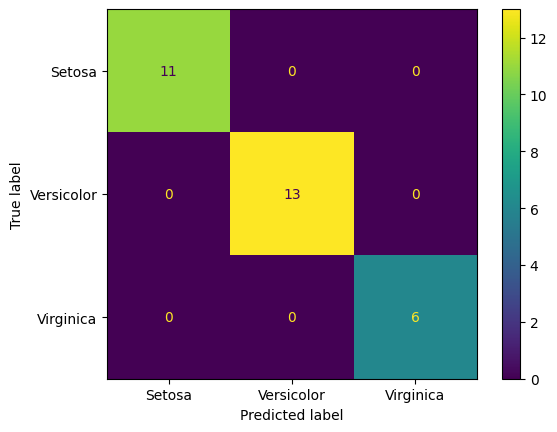

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
error = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))

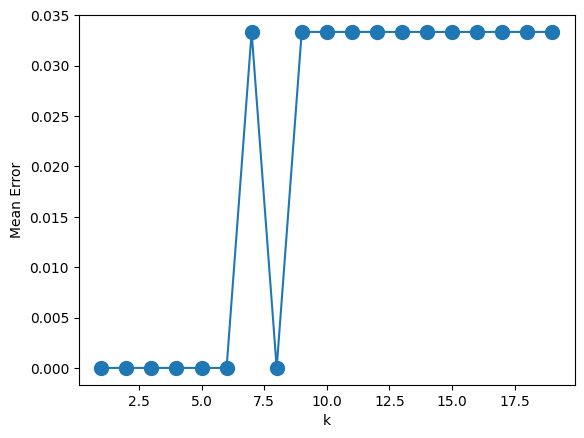

In [ ]:
plt.plot(range(1, 20), error, marker='o', markersize=10)
plt.xlabel('k')
plt.ylabel('Mean Error')
plt.show()